In [35]:
import os
print(os.getcwd())
# change working directory to project root
import platform
if platform.system() is "Windows":
    os.chdir('G:\\sven\\git\\cardio')
print(os.getcwd())
import SimpleITK as sitk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

G:\sven\git\cardio
G:\sven\git\cardio


In [69]:
img = sitk.ReadImage('data/processed/nrrd_volume_export_7/0003-04NEJQUZ-2007-03-13_volume_mask.nrrd')

In [70]:
img.GetDepth()

16

In [71]:
img.GetDimension()

4

In [72]:
img.GetSpacing()

(1.3671875, 1.3671875, 6.0, 1.0)

In [73]:
img.GetHeight()

256

In [74]:
img.GetWidth()

256

In [75]:
img.GetMetaDataKeys()

('ITK_InputFilterName',
 'NRRD_kinds[0]',
 'NRRD_kinds[1]',
 'NRRD_kinds[2]',
 'NRRD_kinds[3]')

In [76]:
img.GetSize()

(256, 256, 16, 25)

In [77]:
nda = sitk.GetArrayFromImage(img)

In [78]:
nda.shape

(25, 16, 256, 256)

In [79]:
from scipy import stats

In [80]:
nda.mean()

0.009777603149414062

In [81]:
nda.size

26214400

In [82]:
nda.max()

3.0

In [83]:
nda.min()

0.0

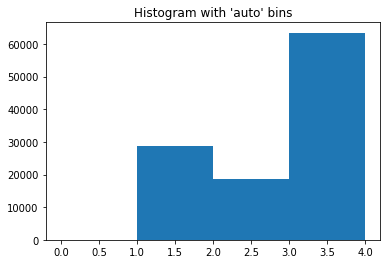

In [94]:
import matplotlib.pyplot as plt
nda_flat = nda.flatten()
nda_one = nda_flat[nda_flat >0]
plt.hist(nda_one, bins=[0,1,2,3,4])  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

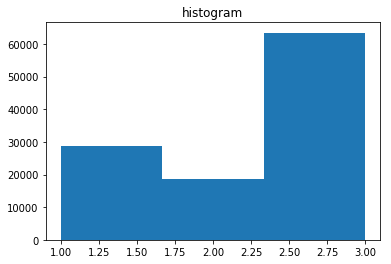

In [116]:
plt.hist(nda_one, bins = 3) 
plt.title("histogram") 
plt.show()

In [96]:
from collections import Counter

In [97]:
c = Counter(nda_flat)

In [98]:
c.most_common()

[(0.0, 26103567), (3.0, 63448), (1.0, 28800), (2.0, 18585)]

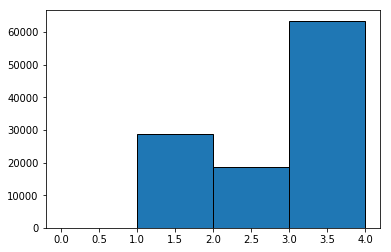

In [108]:
bins = np.arange(5)

frq, edges = np.histogram(nda_one, bins)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
ax.ticklabel_format(useOffset=False)
plt.show()

In [100]:
most_c = c.most_common()
most_c

[(0.0, 26103567), (3.0, 63448), (1.0, 28800), (2.0, 18585)]

In [101]:
value, amount = zip(*most_c)

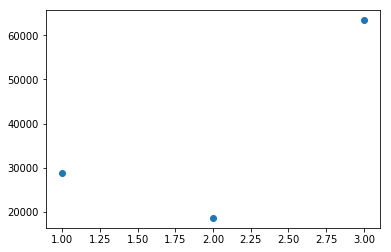

In [104]:
plt.scatter(value[1:], amount[1:])